# Introduction to Matplotlib

In [1]:
%matplotlib inline
# Magic command that tells that we wants visualization to appear within the notebook
import matplotlib.pyplot as plt

[]

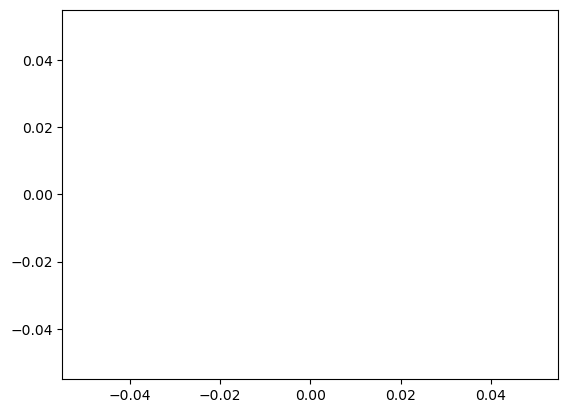

In [2]:
plt.plot()

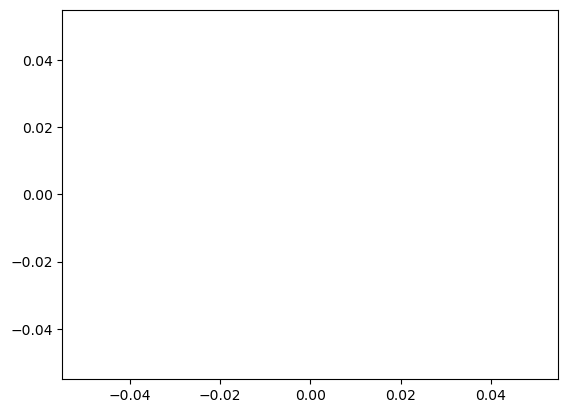

In [3]:
plt.plot();

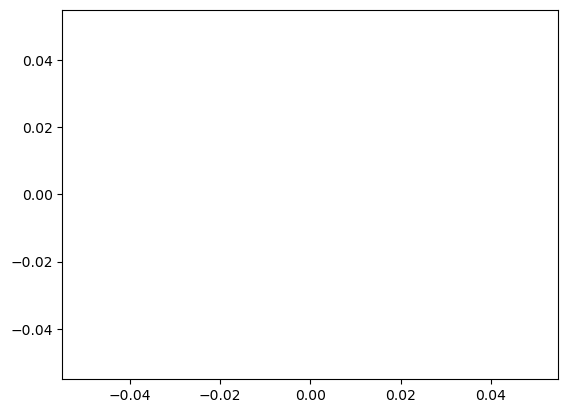

In [4]:
plt.plot()
plt.show()

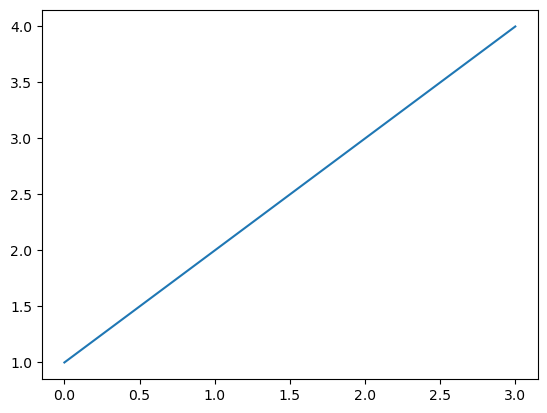

In [5]:
plt.plot([1, 2, 3, 4]);

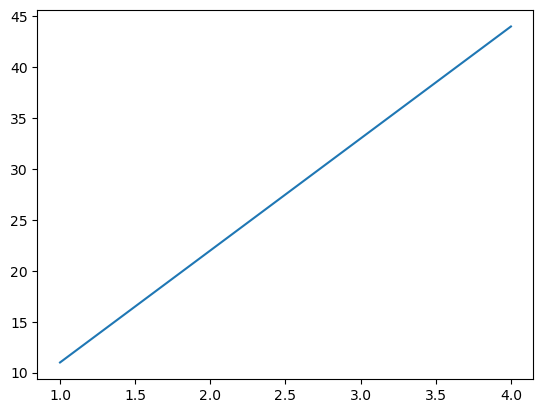

In [6]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
# Stateless way for plotting
plt.plot(x, y);

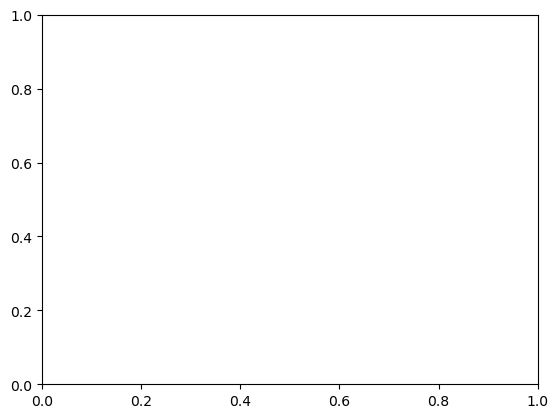

In [7]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # add some axes
plt.show()

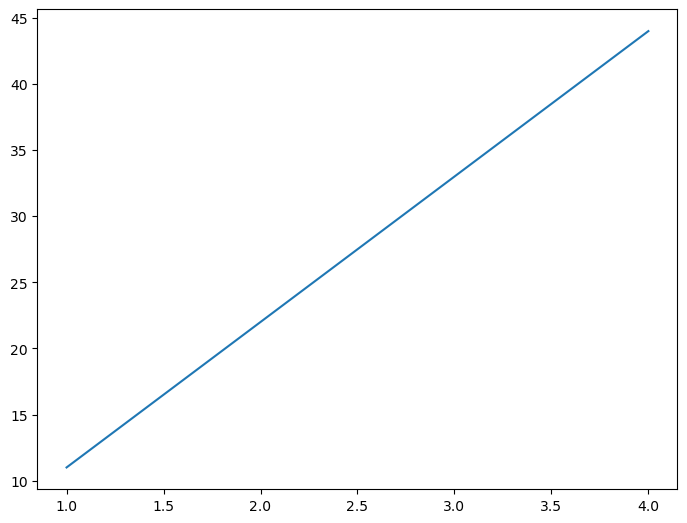

In [8]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

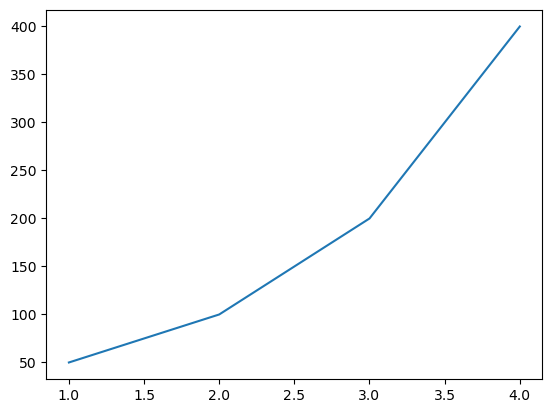

In [9]:
# 3rd method (Recommended)
fig, ax = plt.subplots()
ax.plot(x, [50, 100, 200, 400]); # add some data
type(fig), type(ax)

# Matplotlib example workflow

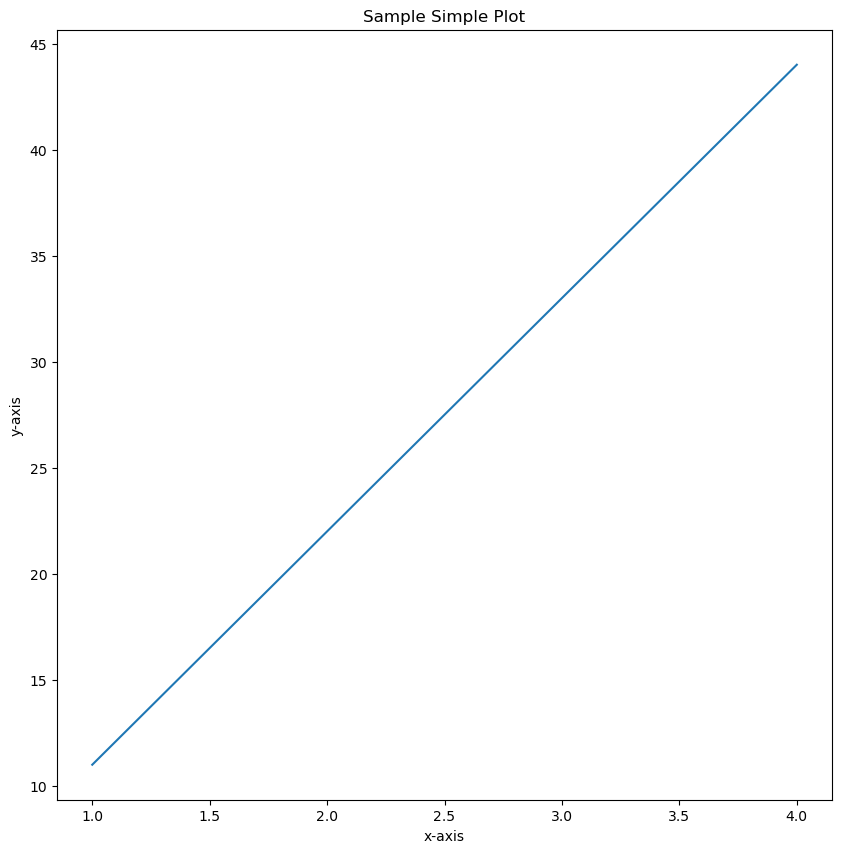

In [10]:
# A matplotlib workflow

# 0. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize = (10,10)) # (width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title = "Sample Simple Plot", xlabel = "x-axis", ylabel = "y-axis")

# 5. Save & show (you save the whole figure)
fig.savefig("images/sample_plot.png")

## Making figures with NumPy arrays

We want:
* Line Plot
* Scatter Plot
* Bar Plot
* Histogram
* Subplots

In [11]:
import numpy as np

In [12]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

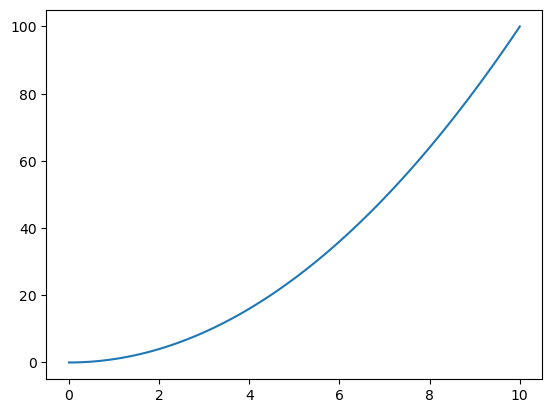

In [13]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2)

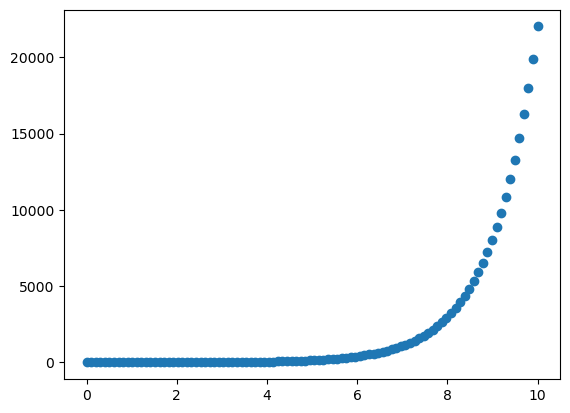

In [14]:
# Use same data to make a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

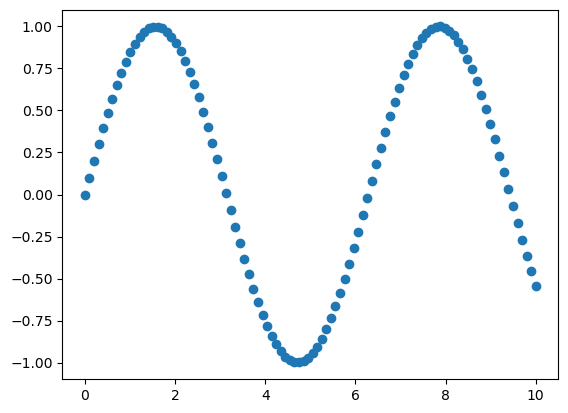

In [15]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x))

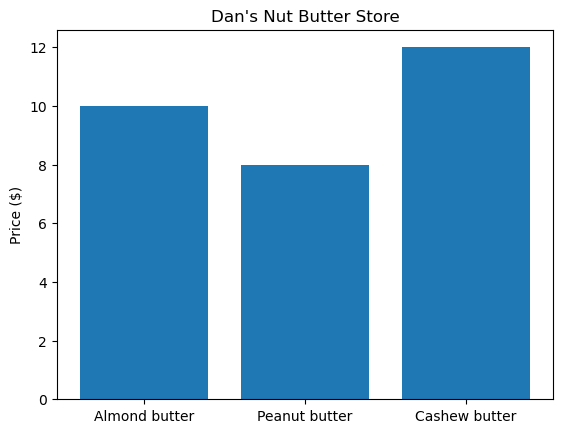

In [16]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}

fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values()) #(x, y)
ax.set(title = "Dan's Nut Butter Store",
       ylabel = "Price ($)");

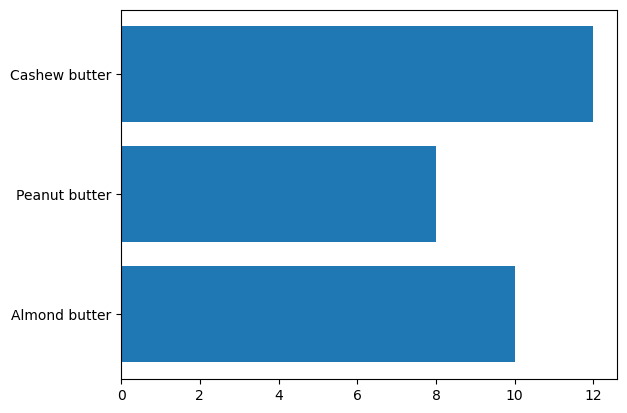

In [17]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

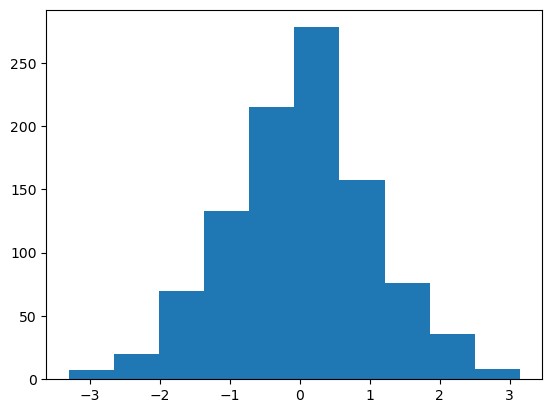

In [18]:
# Make some data for histogram and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

## Two options for subplots

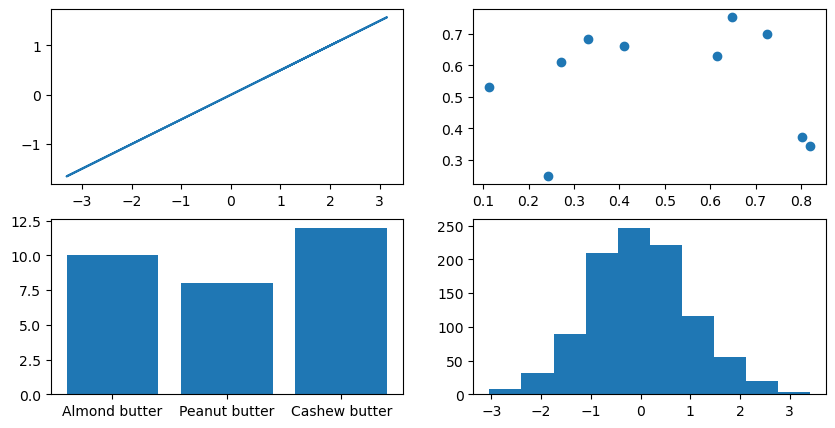

In [19]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2,
                                             ncols = 2,
                                             figsize = (10, 5))

# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

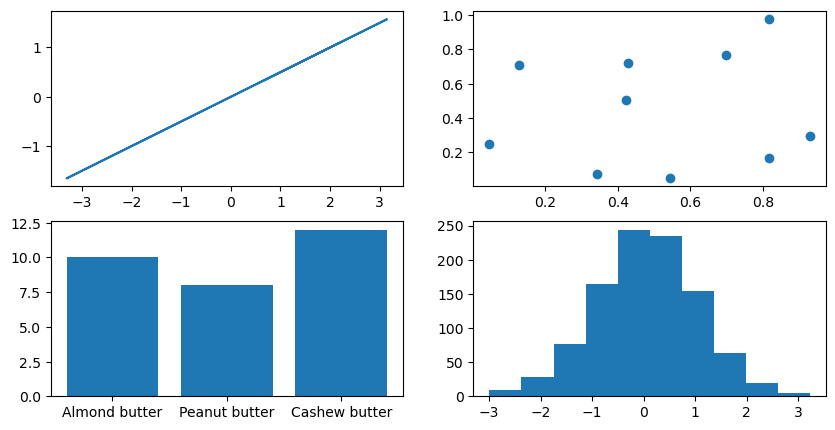

In [20]:
# Subplot option 2
fig, ax = plt.subplots(nrows = 2,
                       ncols = 2,
                       figsize = (10, 5))

# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from Pandas DataFrame

In [21]:
import pandas as pd

In [22]:
# Make a dataframe
car_sales = pd.read_csv("data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


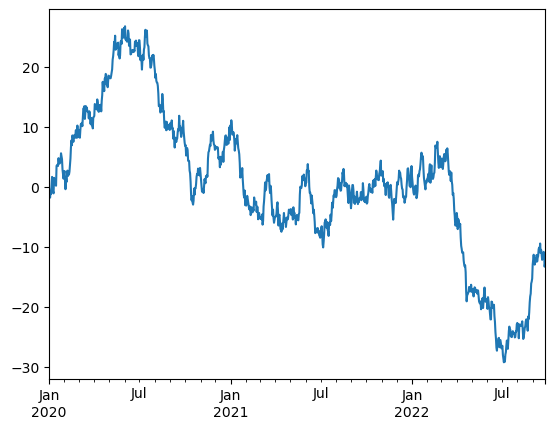

In [23]:
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range("1/1/2020", periods = 1000))
ts = ts.cumsum()
ts.plot();

In [24]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex = True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [25]:
type(car_sales["Price"][0])

str

In [26]:
# Remove the last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [27]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods = len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [28]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


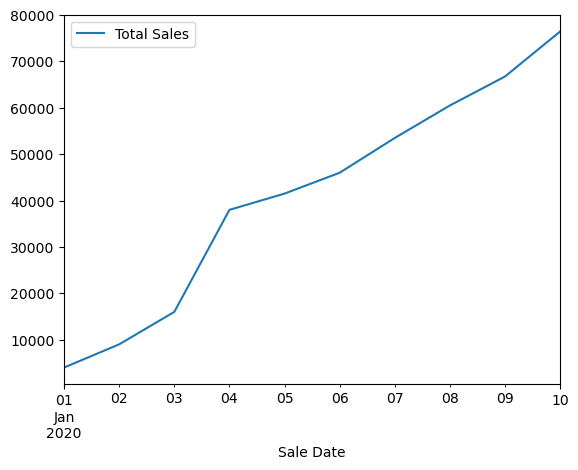

In [29]:
# Let's plot the total sales
car_sales.plot(x = "Sale Date", y = "Total Sales");

<Axes: xlabel='Odometer (KM)', ylabel='Price'>

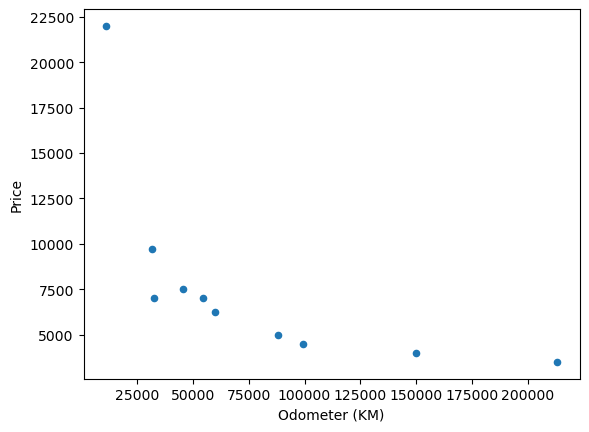

In [30]:
car_sales.plot(x = "Odometer (KM)", y = "Price", kind = "scatter")

In [31]:
# How about a bar graph ?
x = np.random.rand(10, 4)
x
# Turn it into a dataframe
df = pd.DataFrame(x, columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.477420,0.466976,0.527781,0.660822
1,0.352419,0.086289,0.252606,0.533866
2,0.936340,0.420711,0.233805,0.678297
3,0.820795,0.673639,0.378190,0.572375
4,0.897181,0.353059,0.258733,0.193798
5,0.819220,0.546109,0.166515,0.185894
6,0.205217,0.461263,0.055543,0.094214
7,0.531100,0.648280,0.967352,0.373584
8,0.163169,0.302678,0.295191,0.729203
9,0.904976,0.055815,0.512653,0.350451


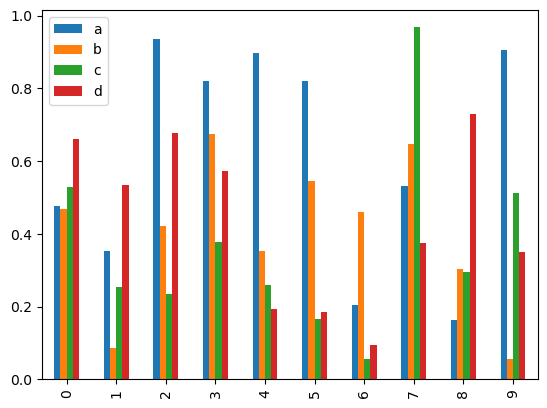

In [32]:
df.plot.bar();

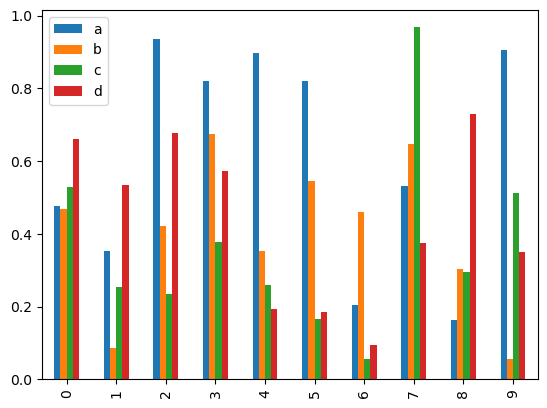

In [33]:
df.plot(kind = "bar");

In [34]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


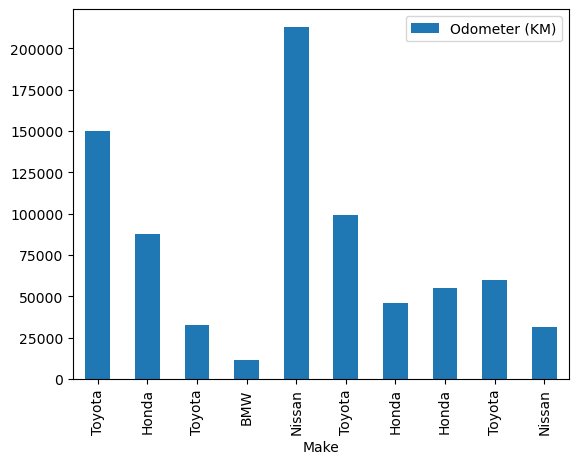

In [35]:
car_sales.plot(x = "Make", y = "Odometer (KM)", kind = "bar");

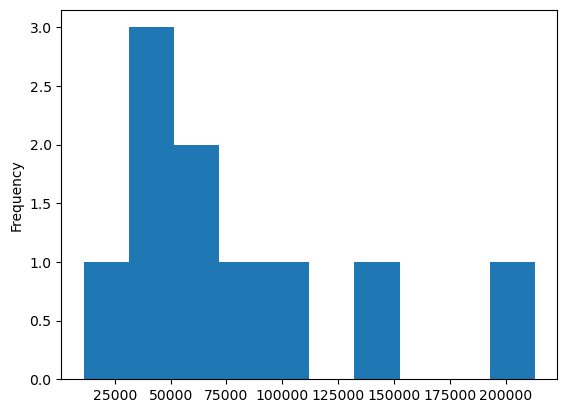

In [36]:
# How about histograms ?
car_sales["Odometer (KM)"].plot.hist();

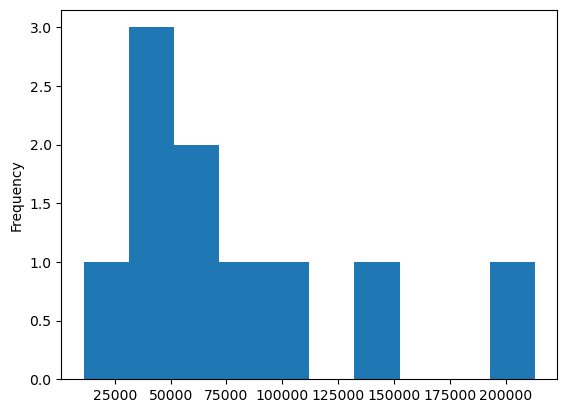

In [37]:
car_sales["Odometer (KM)"].plot(kind = "hist");

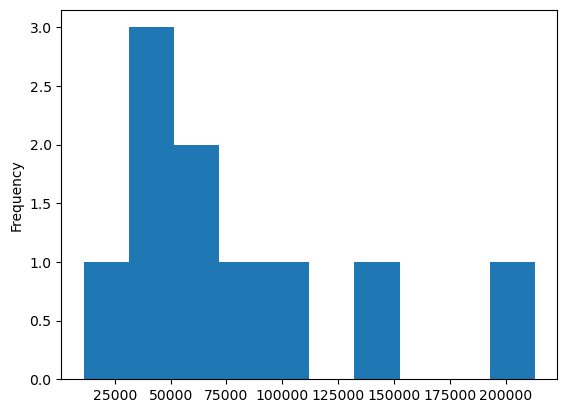

In [38]:
car_sales["Odometer (KM)"].plot.hist(bins = 10);

In [39]:
# Let's try on another dataset
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


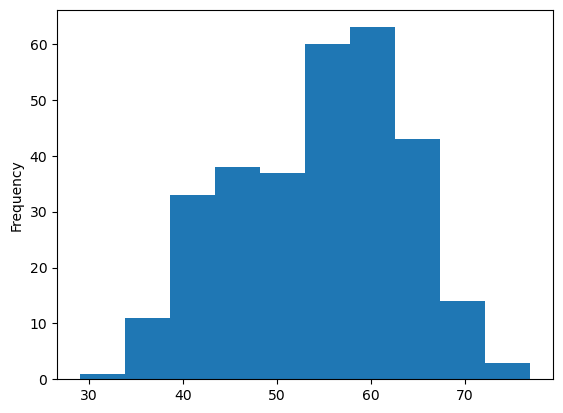

In [40]:
# Create a histogram of age
heart_disease["age"].plot.hist(bins = 10);

In [41]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


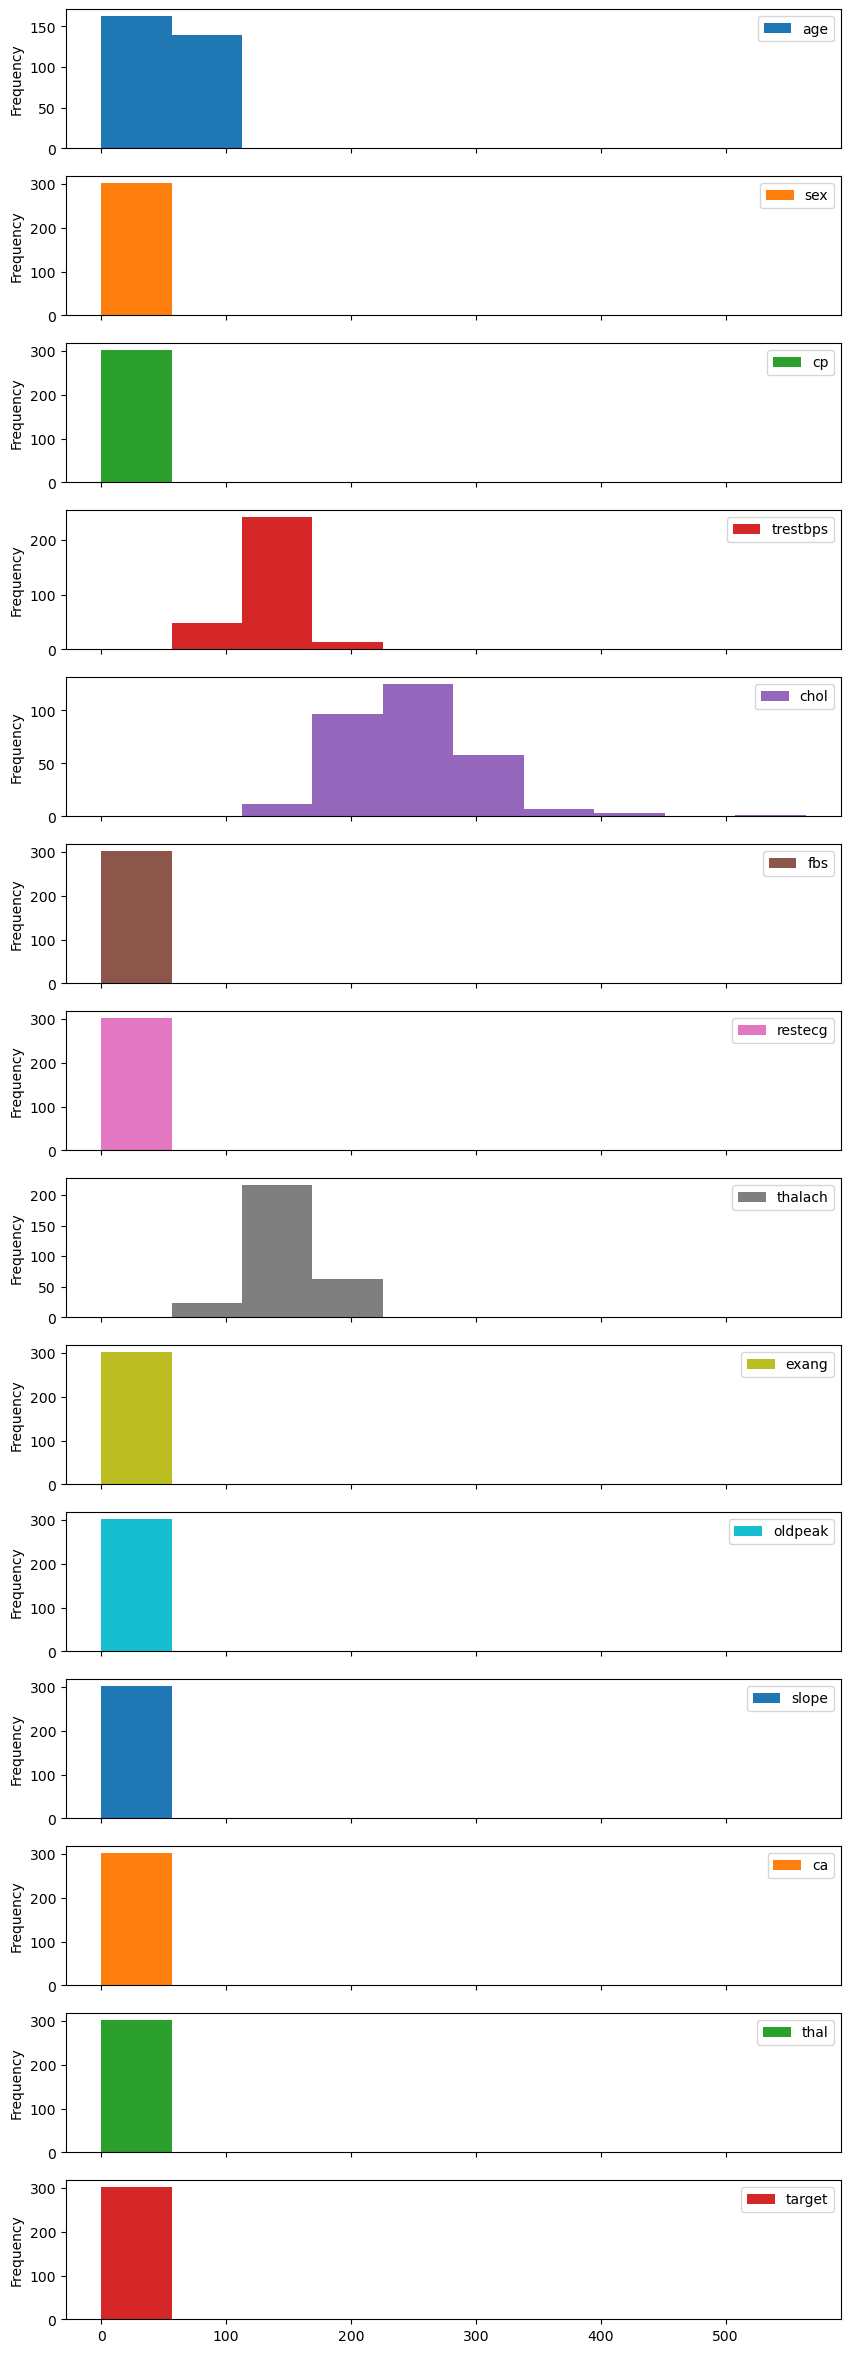

In [42]:
heart_disease.plot.hist(figsize = (10, 30), subplots = True);

### Which one should you use ? (pyplot vs matplotlib OO method)

* When plotting something quickly, okay to use the pyplot method.
* When plotting something more advanced, use the OO method

In [43]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


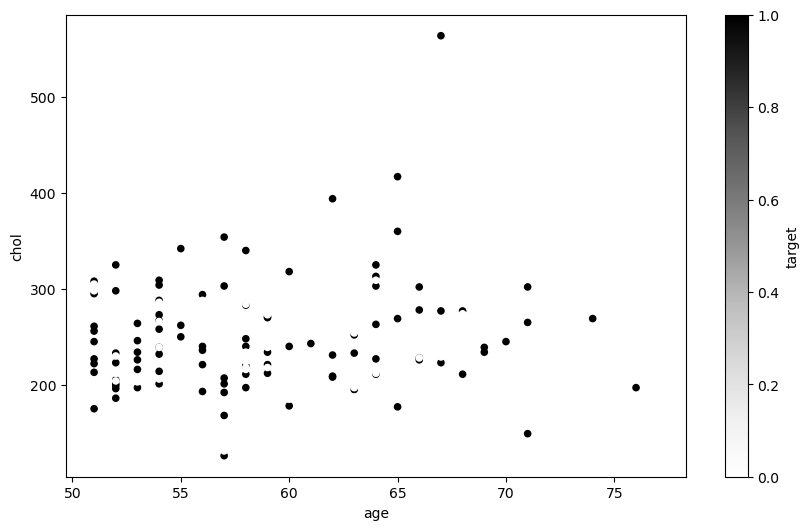

In [44]:
# Pyplot method
over_50.plot(kind = "scatter",
             x = "age",
             y = "chol",
             c = "target",
             figsize = (10, 6));

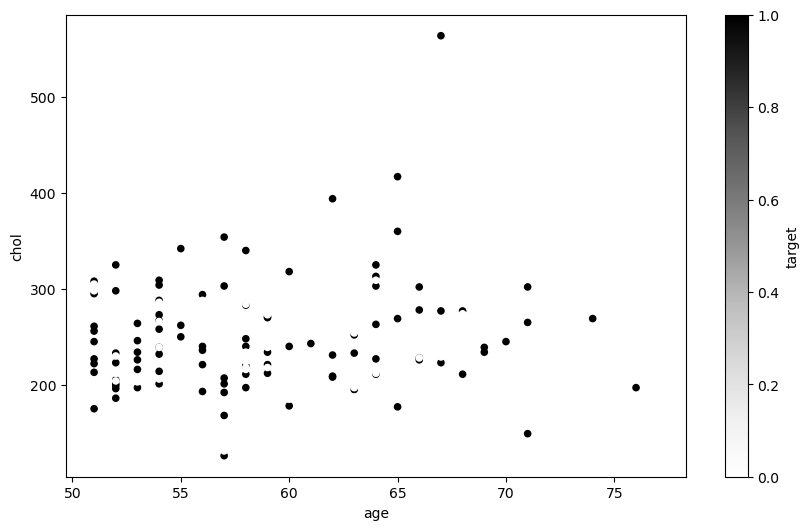

In [45]:
# OO method mixed with pyplot
fig, ax = plt.subplots(figsize = (10, 6))
over_50.plot(kind = "scatter",
             x = "age",
             y = "chol",
             c = "target",
             ax = ax);

# ax.set_xlim(45, 100);

In [46]:
over_50.target.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

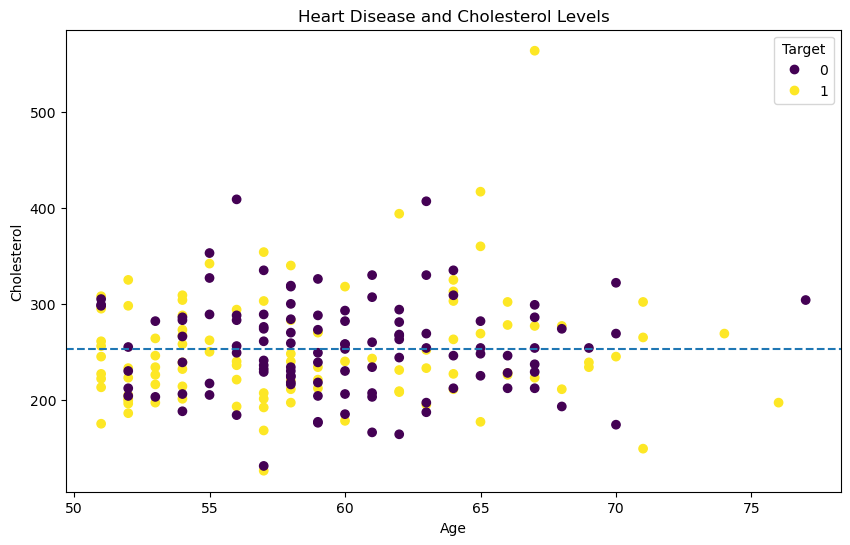

In [47]:
# OO method from scratch
fig, ax = plt.subplots(figsize = (10, 6))

# Plot the data
scatter = ax.scatter(x = over_50["age"],
                     y = over_50["chol"],
                     c = over_50["target"])

# Customize the plot
ax.set(title = "Heart Disease and Cholesterol Levels",
       xlabel = "Age",
       ylabel = "Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title = "Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle = "--");

In [48]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


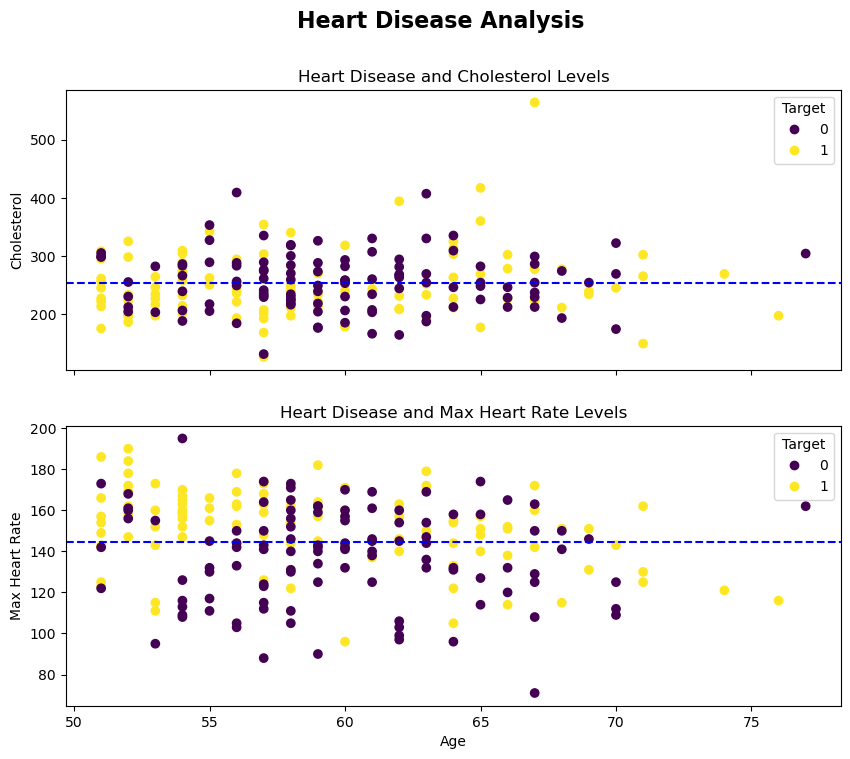

In [49]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 8))

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")


# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

## Customizing Matplotlib plots and getting stylish

In [50]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [51]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500


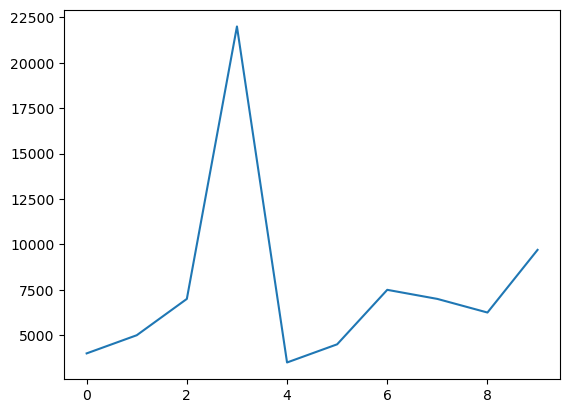

In [52]:
car_sales["Price"].plot();

In [53]:
# Change the style... 
plt.style.use("seaborn-v0_8-whitegrid")

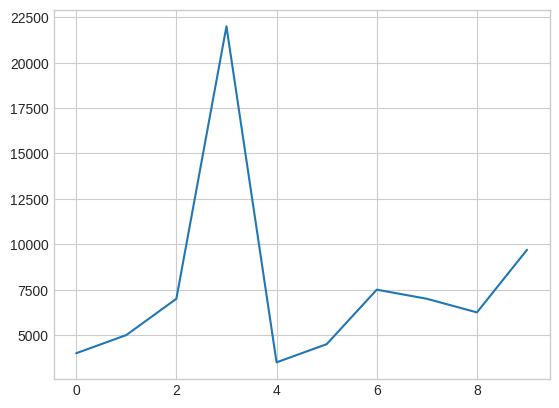

In [54]:
car_sales["Price"].plot();

In [55]:
plt.style.use("seaborn-v0_8")

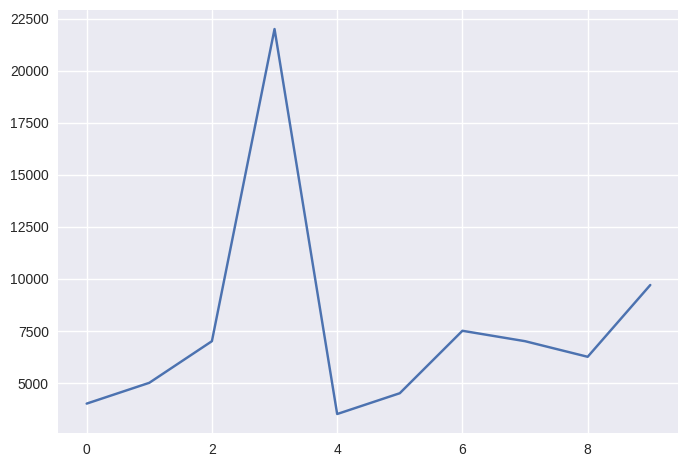

In [56]:
car_sales["Price"].plot();

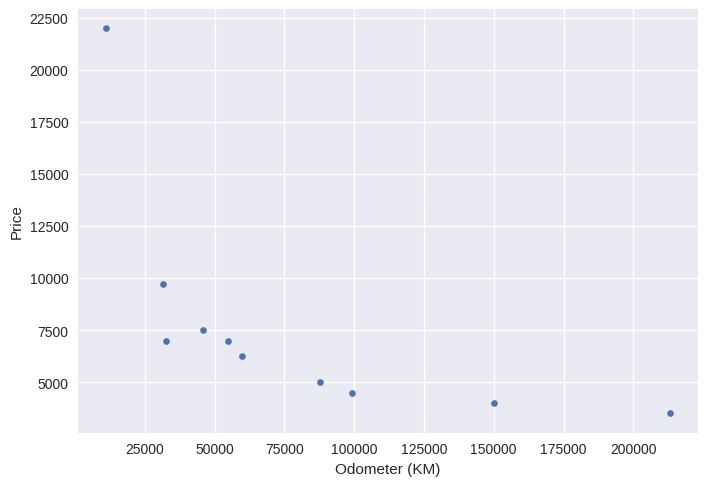

In [60]:
car_sales.plot(x = "Odometer (KM)", y = "Price", kind = "scatter");

In [61]:
plt.style.use("ggplot")

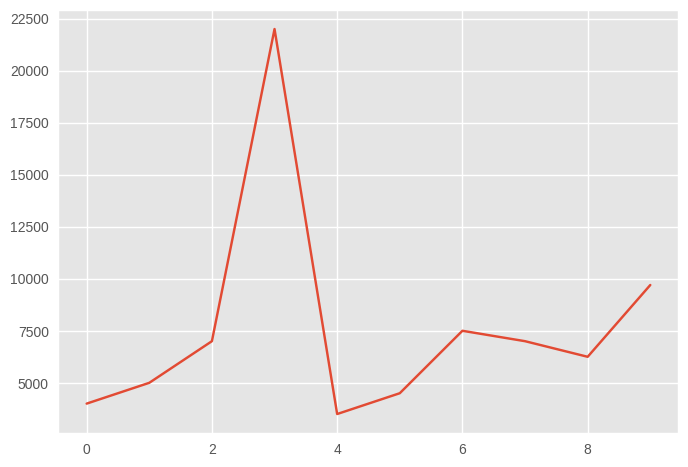

In [62]:
car_sales["Price"].plot();

In [63]:
# Create some data
x = np.random.randn(10, 4)
x

array([[-1.3836626 , -0.14188653,  0.89495559,  1.13792158],
       [-0.32461975,  1.23436401, -0.38019353,  1.45135   ],
       [-0.37764536, -1.26944943, -0.35765096, -0.10214512],
       [-1.06678163, -0.23061914, -0.78766535,  0.08935363],
       [-0.5632309 ,  1.21813823,  2.31200383,  0.28259617],
       [ 0.8715133 , -0.56558455, -0.611646  , -2.46255218],
       [ 1.18547738, -0.14280506,  0.36192513, -1.27174757],
       [ 1.21775669, -0.12294649, -0.59031484,  0.69030386],
       [ 0.3958676 ,  0.04976557, -0.44835851, -0.50661143],
       [-1.09123144, -1.39534424,  0.36007137, -0.11943303]])

In [65]:
df = pd.DataFrame(x, columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-1.383663,-0.141887,0.894956,1.137922
1,-0.324620,1.234364,-0.380194,1.451350
2,-0.377645,-1.269449,-0.357651,-0.102145
3,-1.066782,-0.230619,-0.787665,0.089354
4,-0.563231,1.218138,2.312004,0.282596
5,0.871513,-0.565585,-0.611646,-2.462552
6,1.185477,-0.142805,0.361925,-1.271748
7,1.217757,-0.122946,-0.590315,0.690304
8,0.395868,0.049766,-0.448359,-0.506611
9,-1.091231,-1.395344,0.360071,-0.119433


matplotlib.axes._axes.Axes

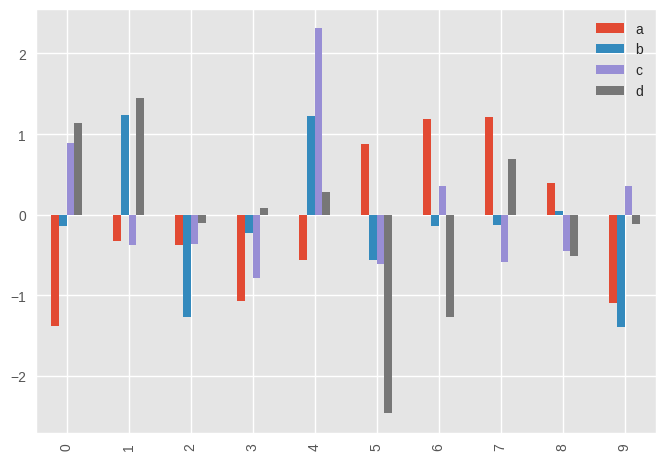

In [69]:
ax = df.plot(kind = "bar")
type(ax)

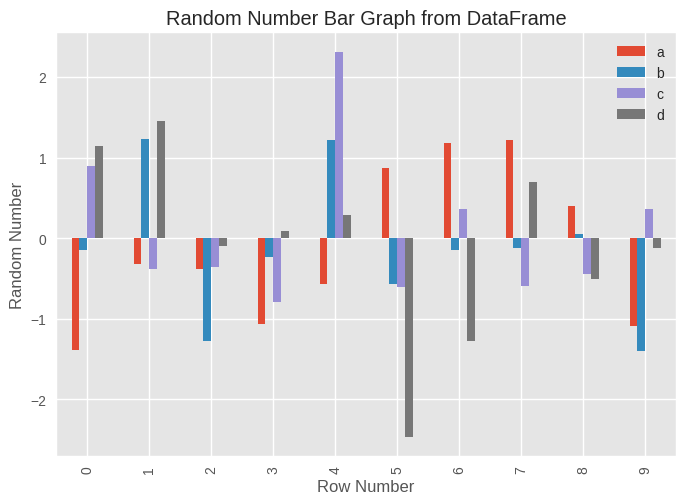

In [70]:
# Customize our plot with the set() method
ax = df.plot(kind = "bar")
# Add some labels and a title
ax.set(title = "Random Number Bar Graph from DataFrame",
       xlabel = "Row Number",
       ylabel = "Random Number")
ax.legend().set_visible(True)

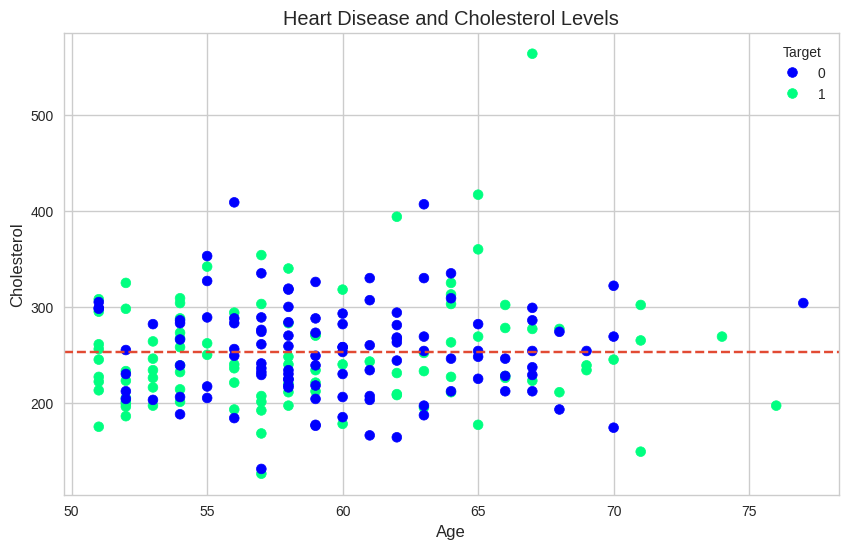

In [78]:
# Set the style
plt.style.use("seaborn-v0_8-whitegrid")

# OO method from scratch
fig, ax = plt.subplots(figsize = (10, 6))

# Plot the data
scatter = ax.scatter(x = over_50["age"],
                     y = over_50["chol"],
                     c = over_50["target"],
                     cmap = "winter") # this changes the colour scheme (colour map)

# Customize the plot
ax.set(title = "Heart Disease and Cholesterol Levels",
       xlabel = "Age",
       ylabel = "Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title = "Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle = "--");

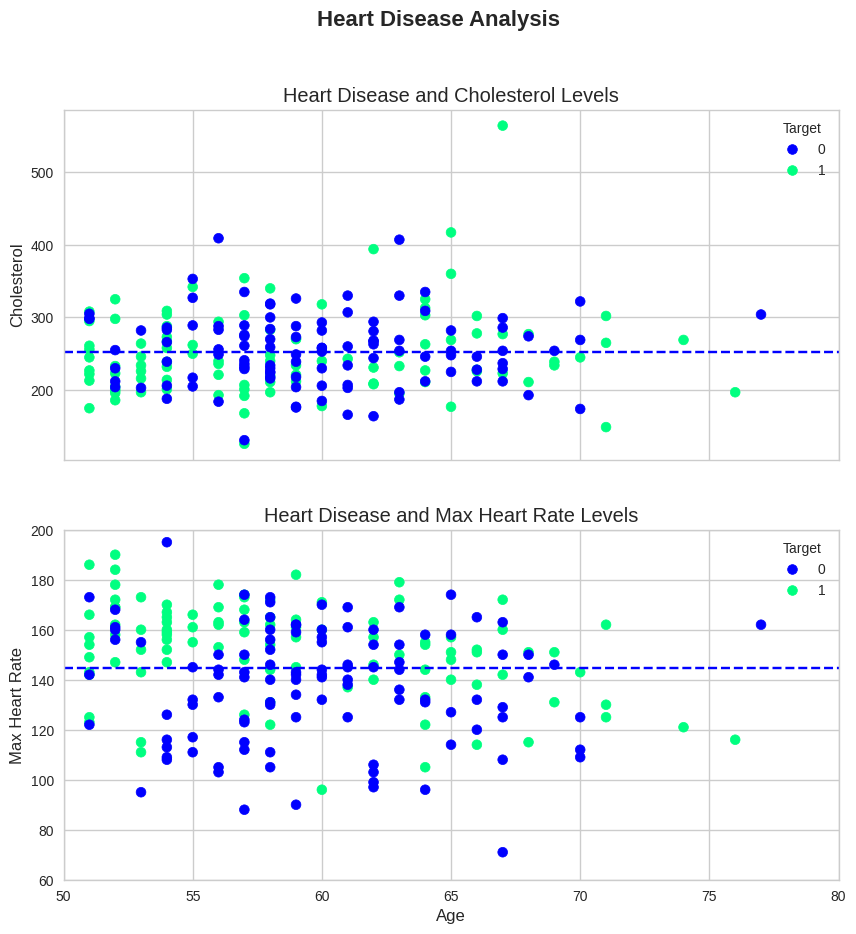

In [90]:
# Customizing the y and x axis limitations

# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 10))

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap = "winter")
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Change the x axis limits
ax0.set_xlim([50, 80])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")


# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap = "winter")

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Change the y axis limits
ax1.set_ylim([60, 200])

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

In [91]:
fig.savefig("images/heart-disease-analysis-plot.png")

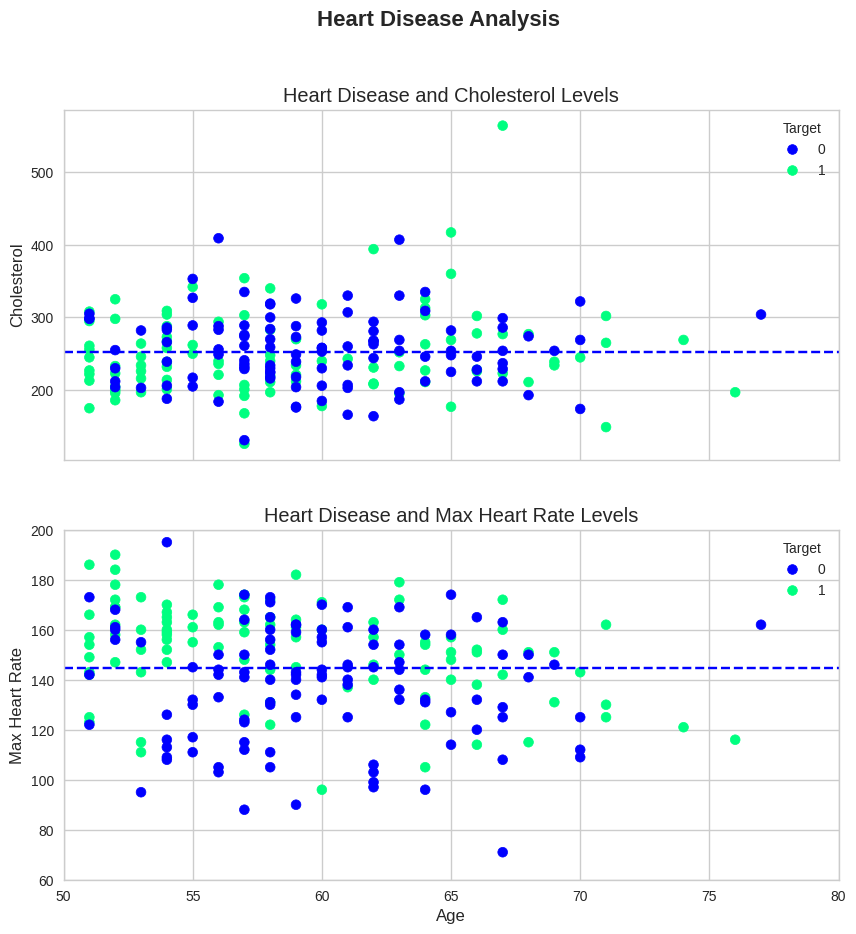

In [92]:
fig